In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# --- CONFIGURAÇÕES DE IDENTIDADE VISUAL (PALETA GRAN) ---
COR_AZUL_PRINCIPAL = "#0D134C"
COR_VERMELHO = "#DD303E"
COR_PRETO = "#000000"
COR_BRANCO = "#FFFFFF"
FUNDO_EIXOS = "#F9F9F9"

# Tipografia redimensionada (Conforme Boas Práticas)
FONT_LABEL = 20
FONT_TICK = 18
FONT_SUBFIGURE = 24

# Definição do tema
sns.set_theme(style="whitegrid", rc={"axes.facecolor": FUNDO_EIXOS})

# Força o uso da fonte DejaVu Sans para suporte a todos os glifos matemáticos
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

# Fixa semente para geração intencional de dados didáticos
np.random.seed(28)

### Transformação Polinomial (Curvando a Regressão Linear)

Este script gera a **Figura [FIG_T_POLI]** para a Aula 4.
A visualização foca na "Intuição Matemática" descrita no material: como uma simples regressão linear consegue abraçar dados complexos quando criamos novos atributos baseados em potências (como $X^2$ e $X^3$).

* **(a) Regressão Linear Simples (Sem Transformação):** Mostra o "underfitting" clássico. A linha reta (modelo Linear Simples) é rígida e não consegue capturar a natureza sinuosa (em formato de 'S') dos dados no eixo original.
* **(b) Regressão com Transformação Polinomial (Grau 3):** Ao adicionar variáveis de ordem superior, a regressão linear ganha a flexibilidade matemática necessária para criar curvas complexas e se ajustar perfeitamente aos dados, validando o poder da Engenharia de Atributos.

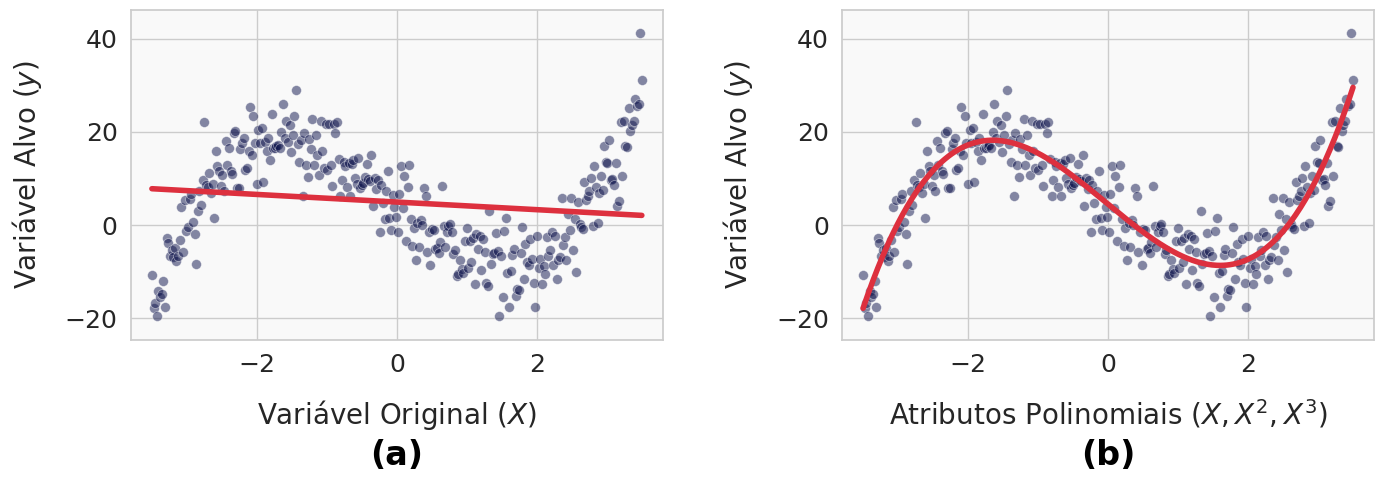

In [5]:
# 1. Geração de Dados Sintéticos Didáticos (Relação Cúbica "S" Intensa com Ruído)
# Aumentamos o volume para 300 observações para uma nuvem mais densa
X = np.linspace(-3.5, 3.5, 300).reshape(-1, 1)
# Função ajustada para curvar de forma mais dramática: y = 1.5*X^3 - 12*X + 5
y = 1.5 * X**3 - 12 * X + 5 + np.random.randn(300, 1) * 5

# 2. Treinamento dos Modelos
# Modelo A: Regressão Linear Simples
modelo_linear = LinearRegression()
modelo_linear.fit(X, y)
y_pred_linear = modelo_linear.predict(X)

# Modelo B: Regressão Linear com Transformação Polinomial (Grau 3)
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

modelo_poly = LinearRegression()
modelo_poly.fit(X_poly, y)
y_pred_poly = modelo_poly.predict(X_poly)

# 3. Configuração da Figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), facecolor=COR_BRANCO)

# ==========================================================
# (a) SUBPLOT ESQUERDO: Regressão Linear (Underfitting)
# ==========================================================
# Reduzimos o tamanho do ponto (s=50) devido ao maior volume de dados
ax1.scatter(X, y, color=COR_AZUL_PRINCIPAL, alpha=0.5, s=50, edgecolor=COR_BRANCO, linewidth=0.5, zorder=3)
ax1.plot(X, y_pred_linear, color=COR_VERMELHO, linewidth=4, zorder=4)

ax1.set_xlabel("Variável Original ($X$)", fontsize=FONT_LABEL, labelpad=15)
ax1.set_ylabel("Variável Alvo ($y$)", fontsize=FONT_LABEL, labelpad=15)

# ==========================================================
# (b) SUBPLOT DIREITO: Transformação Polinomial (Ajuste Ideal)
# ==========================================================
ax2.scatter(X, y, color=COR_AZUL_PRINCIPAL, alpha=0.5, s=50, edgecolor=COR_BRANCO, linewidth=0.5, zorder=3)
ax2.plot(X, y_pred_poly, color=COR_VERMELHO, linewidth=4, zorder=4)

ax2.set_xlabel("Atributos Polinomiais ($X, X^2, X^3$)", fontsize=FONT_LABEL, labelpad=15)
ax2.set_ylabel("Variável Alvo ($y$)", fontsize=FONT_LABEL, labelpad=15)

# ==========================================================
# FINALIZAÇÃO: Layout, Subfiguras e Salvamento
# ==========================================================
for ax in [ax1, ax2]:
    ax.tick_params(axis='both', labelsize=FONT_TICK)
    ax.set_xlim(-3.8, 3.8)
    ax.set_ylim(min(y) - 5, max(y) + 5)

# Posição das letras indicativas ancoradas
ax1.text(0.5, -0.38, '(a)', transform=ax1.transAxes, fontsize=FONT_SUBFIGURE, fontweight='bold', color=COR_PRETO, ha='center')
ax2.text(0.5, -0.38, '(b)', transform=ax2.transAxes, fontsize=FONT_SUBFIGURE, fontweight='bold', color=COR_PRETO, ha='center')

plt.tight_layout(w_pad=3.5)
fig.subplots_adjust(top=0.90, bottom=0.35)

# Salvamento na estrutura de arquivos do projeto
caminho_save = os.path.join('..', 'outputs', 'figures', 'aula_04')
os.makedirs(caminho_save, exist_ok=True)
plt.savefig(os.path.join(caminho_save, '05_transformacao_polinomial.png'), 
            dpi=300, bbox_inches='tight', pad_inches=0.4)

plt.show()